# Simple Gradient Checking with pytorch
First numpy program to evaluate the program.
Then we switch to pytorch for the awesome automtic differentation 

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0, 2.0, 3.0, -4.0]).reshape(1,4)
y = np.array([0.0]).reshape(1, 1)
W1 = np.array([[2.0, 0.5, 3.0, 3.0], [-3.0, 3.0, -1.0, 0.0]]).T
W2 = np.array([1.0, 3.0]).reshape(2, 1)

def sigmoid(x):
    return 1.0/(1+np.exp(x))

def nn(x, W1, W2):
    s = x@W1
    a = sigmoid(s)
    out = a @ W2
    print('Forward pass:\n','-'*20)
    print('s:', s.ravel())
    print('a:', a.ravel())
    print('out:', out.ravel())
    print('-'*20)
    return out

def loss(x, y, W1, W2):
    pred = nn(x, W1, W2)
    diff = pred - y
    loss = diff**2
    return loss
print('sigmoid(0):', sigmoid(0))
print('nn(x):', nn(x, W1, W2).ravel())
print('loss((x,y)):', loss(x, y, W1, W2).ravel())


sigmoid(0): 0.5
Forward pass:
 --------------------
s: [0. 0.]
a: [0.5 0.5]
out: [2.]
--------------------
nn(x): [2.]
Forward pass:
 --------------------
s: [0. 0.]
a: [0.5 0.5]
out: [2.]
--------------------
loss((x,y)): [4.]


# Automatic differentation using pytorch
Lets start simple and then after that compute the gradient of the neural net.

Gradient of f(z)=1/(1 + e^{-z}) at z = 0 tensor([0.2500])
And lets plot the computation graph


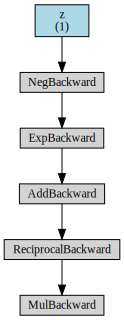

In [25]:
# Automatic differentation using pytorch
import torch
from torchviz import make_dot
z = torch.zeros(1, requires_grad=True)
sz = 1.0 / (1+ torch.exp(-z))
sz.backward()
print('Gradient of f(z)=1/(1 + e^{-z}) at z = 0', z.grad)

print('And lets plot the computation graph')
make_dot(sz, params={'z':z})

Lets try a slight more complicated f(z)=z + 1/(z + e^{-z}) 
Gradient of f(z)=z+1/(z+e^{-z}) at x = 0 tensor([1.])
********************
And lets plot the computation graph


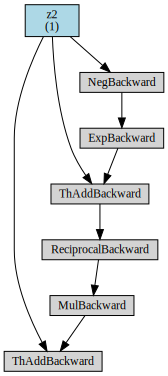

In [22]:
print('Lets try a slight more complicated f(z)=z + 1/(z + e^{-z}) ')

z2 = torch.zeros(1, requires_grad=True)
sz2 = 1.0 / (z2 + torch.exp(-z2))+z2
sz2.backward()
print('Gradient of f(z)=z+1/(z+e^{-z}) at x = 0', z2.grad)

print('*'*20)
print('And lets plot the computation graph')
make_dot(sz2, params={'z2':z2})

## Automated Derivative of the Neural Net
Lets go!

Gradient of f(z)=1/(1+e^{-z}) at x = 0 tensor([0.2500])
Forward Pass Loss (loss(x, y):  tensor([[4.]], dtype=torch.float64, grad_fn=<PowBackward0>)
Output of neural net, before loss is nn(x):  tensor([[2.]], dtype=torch.float64, grad_fn=<MmBackward>)
Results
L/TW2 grad
 tensor([[2.],
        [2.]], dtype=torch.float64)
L/TW1 grad
 tensor([[  1.,   3.],
        [  2.,   6.],
        [  3.,   9.],
        [ -4., -12.]], dtype=torch.float64)
Lets do the steps
L/td tensor([[4.]], dtype=torch.float64)
L/nnx grad
 tensor([[4.]], dtype=torch.float64)
L/hidden_out grad
 tensor([[ 4., 12.]], dtype=torch.float64)
L/hidden_in grad
 tensor([[1., 3.]], dtype=torch.float64)
********************
And lets plot the computation graph


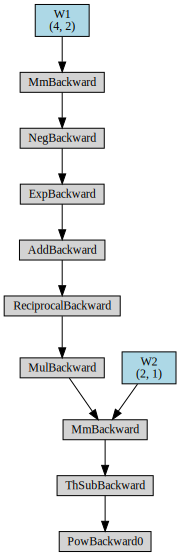

In [13]:
def tsigmoid(z):    
    return 1.0/(1.0 + torch.exp(-z))
TW1 = torch.from_numpy(W1)
TW1.requires_grad=True # means gradient should be stored for this tensor
TW2 = torch.from_numpy(W2)
TW2.requires_grad=True
tx = torch.from_numpy(x)
ty = torch.from_numpy(y)
###  tnnx = tsigmoid(tx @ TW1) @ TW2 in smalller steps
hidden_in = tx @ TW1
hidden_out = tsigmoid(hidden_in)
tnnx = hidden_out @ TW2
td = tnnx - ty
ts = td**2

# ensure we retain gradient of all intermediate computation for printing later
hidden_in.retain_grad()
hidden_out.retain_grad()
tnnx.retain_grad()
td.retain_grad()
print('Forward Pass Loss (loss(x, y): ', ts)
print('Output of neural net, before loss is nn(x): ',tnnx)
ts.backward()
print('Results')
print('L/TW2 grad\n', TW2.grad)
print('L/TW1 grad\n', TW1.grad)
print('Lets do the steps')
print('L/td', td.grad)
print('L/nnx grad\n', tnnx.grad)
print('L/hidden_out grad\n', hidden_out.grad)
print('L/hidden_in grad\n', hidden_in.grad)

print('*'*20)
print('And lets plot the computation graph')
#lets plot the computation grapph

make_dot(ts, params={'W1': TW1, 'W2': TW2})

# Finallly lets look at the crazy function

path:  tensor([0.5000], grad_fn=<MulBackward>) tensor([0.5000], grad_fn=<ThAddBackward>) tensor([0.5000], grad_fn=<MulBackward>) tensor([0.], grad_fn=<ThAddBackward>) tensor([0.], grad_fn=<PowBackward0>) tensor([0.5000], grad_fn=<ThAddBackward>) tensor([2.], grad_fn=<MulBackward>) tensor([1.], grad_fn=<ThMulBackward>)
Resuls: f/x, f/y tensor([1.5000]) tensor([0.5000])
Lets print Path
f/invden tensor([0.5000])
f/den tensor([-2.])
f/xpysqr tensor([-2.])
f/xpy tensor([-0.])
f/sigx tensor([-2.])
f/num tensor([2.])
f/sigy tensor([2.])
f/x tensor([1.5000])
f/y tensor([0.5000])
********************
And lets plot the computation graph


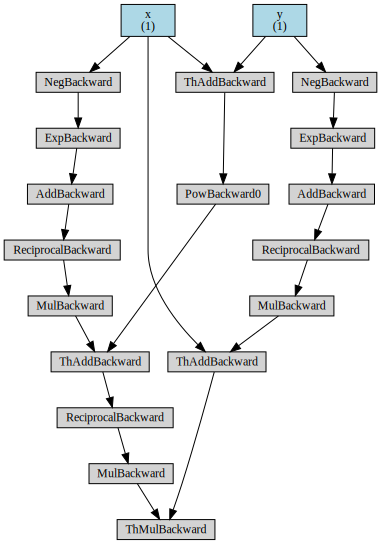

In [14]:
x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)

# forward pass
sigy = 1.0 / (1 + torch.exp(-y)) # sigmoid in numerator   
num = x + sigy # numerator                               
sigx = 1.0 / (1 + torch.exp(-x)) # sigmoid in denominator
xpy = x + y                                              
xpysqr = xpy**2                                          
den = sigx + xpysqr # denominator                        
invden = 1.0 / den                                       
f = num * invden # done!                                 
print('path: ', sigy, num, sigx, xpy, xpysqr, den, invden, f)
sigy.retain_grad()
num.retain_grad()
sigx.retain_grad()
xpy.retain_grad()
xpysqr.retain_grad()
den.retain_grad()
invden.retain_grad()
f.backward()
print('Resuls: f/x, f/y', x.grad, y.grad)
print('Lets print Path')
print('f/invden', invden.grad)
print('f/den', den.grad)
print('f/xpysqr', xpysqr.grad)
print('f/xpy', xpy.grad)
print('f/sigx', sigx.grad)
print('f/num', num.grad)
print('f/sigy', sigy.grad)
print('f/x', x.grad)
print('f/y', y.grad)

print('*'*20)
print('And lets plot the computation graph')
make_dot(f, params={'x': x, 'y': y})